# すべあな界隈年表分析

In [2]:
!cd /content

## データ整形

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame()
for year in range(2018, 2025) :
  df_tmp = pd.read_csv(f'すべあな界隈年表 - {year}年.csv', index_col = False)
  column_filter = ['日付', '曲名/出来事', '作者', 'カテゴリ', 'モチーフ', '解読日']
  df_tmp = df_tmp[column_filter]
  column_filter.append('プ') if 'プ' in df_tmp.columns else column_filter
  df_tmp['日付'].fillna(method='ffill', inplace=True)
  df_tmp['日付'] = pd.to_datetime(df_tmp['日付'], format='%m/%d', errors='coerce')
  df_tmp['日付'] = df_tmp['日付'].apply(lambda x: x.replace(year=year) if pd.notnull(x) else x)
  df = pd.concat([df, df_tmp], axis=0)
df = df[df['カテゴリ'] != '出来事']
df.rename(columns={'曲名/出来事': '曲名'}, inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 0 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      2937 non-null   datetime64[ns]
 1   曲名      2927 non-null   object        
 2   作者      2935 non-null   object        
 3   カテゴリ    2933 non-null   object        
 4   モチーフ    2075 non-null   object        
 5   解読日     797 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 160.7+ KB
None
          日付            曲名           作者  カテゴリ              モチーフ    解読日
0 2018-05-10      .[short]  全てあなたの所為です。     曲         .[short]枠  解読日不明
1 2018-08-29     ..[short]  全てあなたの所為です。     曲        ..[short]枠  解読日不明
2 2018-09-10   全て███の所為です。       idea_0  アレンジ  →イワシがつちからはえてくるんだ    NaN
3 2018-09-11  DSC_0001.AVI  全てあなたの所為です。    予告     DSC_0001.AVI枠  解読日不明
4 2018-09-11             ◘  全てあなたの所為です。    予告              逆再生枠  解読日不明


## 作者の分析

In [39]:
df_author = df['作者'].value_counts()
df_author

全て私の人生です。      111
全てみんなの所為です。     86
全て事象の所為です。      56
全て月夜の所為です。      48
全てあなたの所以です。     42
              ... 
全て娯楽の所為です。       1
全て音の曇りです。        1
全て火花の所為です。       1
全て万里の所為です。       1
スケサン             1
Name: 作者, Length: 570, dtype: int64

In [50]:
df_author_unique = df.drop_duplicates(subset=['作者']).loc[:, '作者']
subekashi_index = df_author_unique[df_author_unique == '全て歌詞の所為です。']
subekashi_index

146    全て歌詞の所為です。
Name: 作者, dtype: object

## 日付ごとの投稿件数を分析

In [ ]:
df_date = df['日付'].value_counts().reset_index()
df_date.columns = ['日付', '投稿動画件数']
start_date, end_date = df['日付'].min(), df['日付'].max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_date.set_index('日付', inplace=True)
df_date = df_date.reindex(complete_date_range, fill_value=0)
df_date.reset_index(inplace=True)
df_date.rename(columns={'index': '日付'}, inplace=True)
df_date = df_date.sort_values('日付')
df_date

,日付,投稿動画件数
0,2018-05-10,1
1,2018-05-11,0
2,2018-05-12,0
3,2018-05-13,0
4,2018-05-14,0
...,...,...
2299,2024-08-25,0
2300,2024-08-26,0
2301,2024-08-27,0
2302,2024-08-28,0


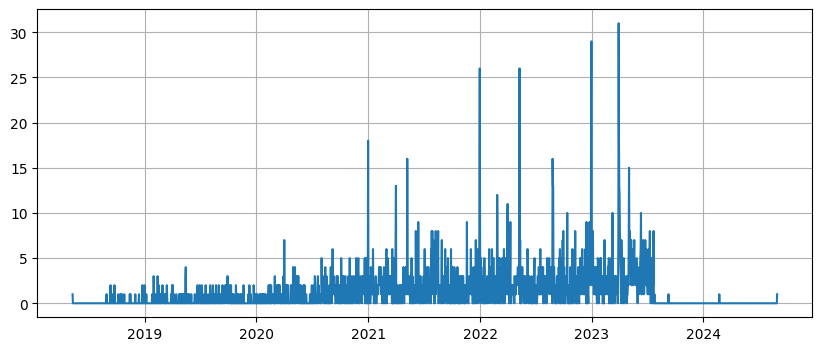

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.grid(True)
plt.rcParams["figure.figsize"] = [10,4.0]
plt.plot(df_date.iloc[:, 0], df_date.iloc[:, 1])
plt.show()

In [53]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=f24e495d50d775598a01a338d5e7637ee28c234370064e369e7bfb2fc7c29c6e
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
